# Modelos Lineares

---

## Regressão Logística

(Infelizmente) Não podemos reolver todos os problemas de aprendizagem supervisionada com uma reta. Vejamos o exemplo a seguir

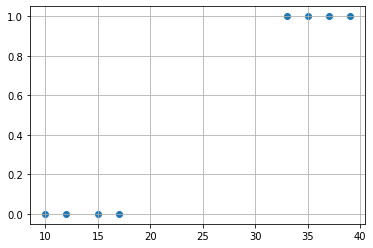

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

M = np.array([[10], [12], [15], [17], [33], [35], [37], [39]])
V = np.array([0, 0, 0, 0, 1, 1, 1, 1])

plt.scatter(M, V)
plt.grid()

Será que dá para traçár uma reta para resolver esse problema?

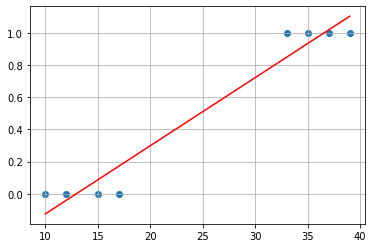

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(M, V)

y_predicted_linear = model.predict(M)
plt.scatter(M, V)
plt.grid()
plt.plot(M, y_predicted_linear, c='r')

# É, não ficou legal... mas por quê?

No eixo Y, temos apenas dois valores: 0 e 1. Ou seja, nosso modelo tem de prever um desses valores. Nesse caso, a saída do modelo é *discreta*. Isso é diferente do nosso exemplo anterior, onde tínhamos uma saída *contínua*. Isso quer dizer que lidamos com um problema de **classificação**!

# Tá, o problema é outro agora, mas como que resolve?

Bom, nesse caso, teremos de usar outro tipo de função que não seja a linear. Para isso, usaremos a **Função Logística**!


\begin{equation}
  ŷ = \frac{1}{1 + e^{-(b + w x)}}
\end{equation}

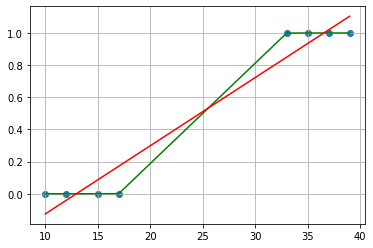

In [23]:
from math import exp

def logistic_function (w, b, x):
  return 1 / (1 + exp(- (b + (w * x))))

w = 0.89
b = -22.1

plt.scatter(M, V)
plt.grid()
plt.plot(M, [logistic_function(w, b, x) for x in M[:, 0]], c = 'g')
plt.plot(M, y_predicted_linear, c='r')

# Opa, agora ficou legal!

Assim como a Regressão Linera, a **Regressão Logística** também pode ser mapeada para um problema de otimização para encontrar o menor erro para $w$ e $b$. A prova é TRIVIAL (só que não) e análoga à do gradiente descendente Regressão Linear. Deixamos como exercício pesquisar sobre ela.

Agora, vamos a parte que interessa: como usar a biblioteca!

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l2", C=1e42) # desabilita a regularização
model.fit(M, V)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Vamos ver se fica legal?

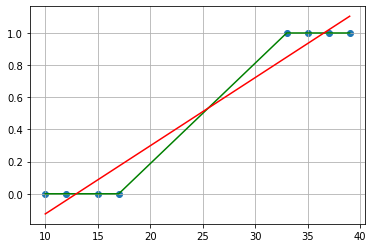

In [25]:
y_predicted = model.predict(M)
plt.scatter(M, V)
plt.grid()
plt.plot(M, y_predicted, c='g')
plt.plot(M, y_predicted_linear, c='r')

In [26]:
model.coef_, model.intercept_

(array([[1.6457558]]), array([-41.68541944]))

# Tá, mas estamos falando de modelos lineares. A função logística não é uma linha. Que tipo de pegadinha é essa?

Não tem pegadinha nenhuma, é só uma questão de *perpectiva*. Se tentarmos visualizar os dados no espaço é como se houvesse uma *linha* separando os conjuntos de dados! Para ser mais algébrico, a função logística define um *hiperplano* que separa os dados!

Para ficar mais simples de entender, dê uma olhada na figura abaixo:

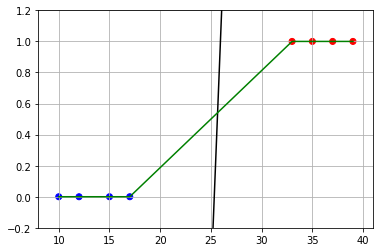

In [28]:
points_x = [x for x in range(10, 41)]

line_bias = model.intercept_
line_w = model.coef_.T
points_y = [(line_w[0] * x + line_bias) for x in points_x]
plt.plot(points_x, points_y, 'k')
plt.scatter(M, V, c=['b' if v == 0 else 'r' for v in V])

plt.plot(M, y_predicted, c='g')

plt.xlim((8, 41))
plt.ylim((-0.2, 1.2))
plt.grid()

A linha preta mostra a **superfície de decisão** gerada pela função logística aprendida: tudo o que está à direita da linha é classificado como vermelho, enquanto o que está à esquerda, azul.